<a href="https://colab.research.google.com/github/neemasingh/neema/blob/master/stock_price_prediction_using_GRU/arima.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import numpy as np
import math
from statsmodels.tsa.stattools import acf, pacf
import statsmodels.tsa.stattools as ts
from statsmodels.tsa.arima_model import ARIMA


In [0]:
variables = pd.read_csv("/content/data.csv")
Close =variables ["Close"]
Close

0      10863.50
1      10987.45
2      11053.00
3      11058.20
4      11035.40
         ...   
235    12113.45
236    12045.80
237    11992.50
238    12125.90
239    12080.85
Name: Close, Length: 240, dtype: float64

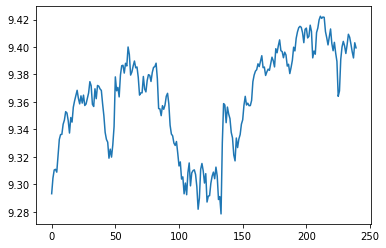

In [0]:
lnClose=np.log(Close)
lnClose
plt.plot(lnClose)
plt.show()

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


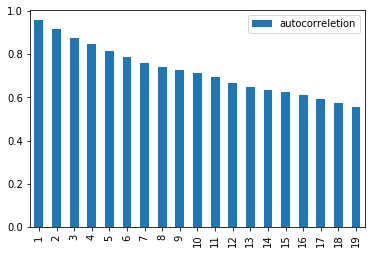

In [0]:
acf_1 =  acf(lnClose)[1:20]
test_df = pd.DataFrame([acf_1]).T
test_df.columns = ['autocorreletion']
test_df.index += 1
test_df.plot(kind='bar')
plt.show()


<function matplotlib.pyplot.show>

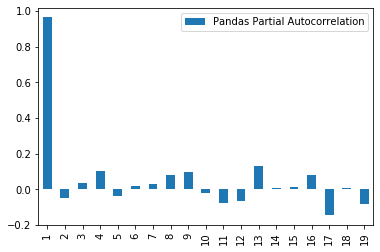

In [0]:
pacf_1 = pacf(lnClose)[1:20]
test_df = pd.DataFrame([pacf_1]).T
test_df.columns = ['Pandas Partial Autocorrelation']
test_df.index += 1
test_df.plot(kind='bar')
plt.show


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


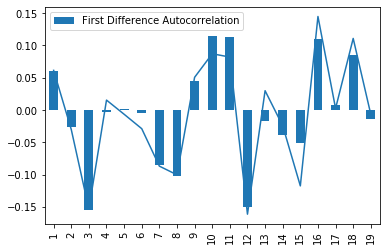

In [0]:
lnClose_diff=lnClose-lnClose.shift()
diff=lnClose_diff.dropna()
acf_1_diff =  acf(diff)[1:20]
test_df = pd.DataFrame([acf_1_diff]).T
test_df.columns = ['First Difference Autocorrelation']
test_df.index += 1
test_df.plot(kind='bar')
pacf_1_diff =  pacf(diff)[1:20]
plt.plot(pacf_1_diff)
plt.show()


In [0]:
price_matrix=lnClose.as_matrix()
model = ARIMA(price_matrix, order=(0,1,0))
model_fit = model.fit(disp=0)
#print(model_fit.summary())

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [0]:
predictions=model_fit.predict(1, 240, typ='levels')
predictions
predictionsadjusted=np.exp(predictions)
predictionsadjusted

tmp = []
train_X = []; train_Y = []
dev_X = []; dev_Y = []
test1_X = []; test1_Y = []
test2_X = []; test2_Y = []

predictions = [np.mean(predictions)] + predictions
        
residual = pd.Series(np.array(predictionsadjusted) - np.array(predictions))
tmp.append(np.array(residual))

train_X.append(tmp[0][:20])
train_Y.append(tmp[0][20])
dev_X.append(tmp[0][:30])
dev_Y.append(tmp[0][30])
test1_X.append(tmp[0][:40])
test1_Y.append(tmp[0][40])
test2_X.append(tmp[0][:50])
test2_Y.append(tmp[0][50])

print(train_X)
print(train_Y)
print(dev_X)
print(dev_Y)
print(test1_X)
print(test1_Y)
print(test2_X)
print(test2_Y)

train_X = pd.DataFrame(train_X)
train_Y = pd.DataFrame(train_Y)
dev_X = pd.DataFrame(dev_X)
dev_Y = pd.DataFrame(dev_Y)
test1_X = pd.DataFrame(test1_X)
test1_Y = pd.DataFrame(test1_Y)
test2_X = pd.DataFrame(test2_X)
test2_Y = pd.DataFrame(test2_Y)
train_X.to_csv('/content/train_X.csv')
train_Y.to_csv('/content/train_Y.csv')
dev_X.to_csv('/content/dev_X.csv')
dev_Y.to_csv('/content/dev_Y.csv')
test1_X.to_csv('/content/test1_X.csv')
test1_Y.to_csv('/content/test1_Y.csv')
test2_X.to_csv('/content/test2_X.csv')
test2_Y.to_csv('/content/test2_Y.csv')

[array([10849.67223565, 10973.6659868 , 11039.23917589, 11044.44101696,
       11021.63294621, 11154.32996097, 11287.52729484, 11328.04171998,
       11329.59227231, 11413.22208987, 11448.58471429, 11518.80981269,
       11507.45575224, 11443.28282091, 11340.59619258, 11469.64223632,
       11431.42858838, 11556.42327098, 11610.34258198, 11655.60881052])]
[11699.674623133205]
[array([10849.67223565, 10973.6659868 , 11039.23917589, 11044.44101696,
       11021.63294621, 11154.32996097, 11287.52729484, 11328.04171998,
       11329.59227231, 11413.22208987, 11448.58471429, 11518.80981269,
       11507.45575224, 11443.28282091, 11340.59619258, 11469.64223632,
       11431.42858838, 11556.42327098, 11610.34258198, 11655.60881052,
       11699.67462313, 11630.39977089, 11584.43329997, 11652.40766237,
       11590.93562897, 11658.40981521, 11570.7283922 , 11583.13283421,
       11629.89959158, 11676.8164189 ])]
[11773.651200686078]
[array([10849.67223565, 10973.6659868 , 11039.23917589, 11044

In [0]:
import pandas as pd
import numpy as np
import os
from keras.models import Sequential, load_model
from keras.layers import Dense, LSTM, Activation
from keras import backend as K
from keras.utils.generic_utils import get_custom_objects
from keras.callbacks import ModelCheckpoint
from keras.regularizers import l1_l2


# Train - Dev - Test Generation
train_X= pd.read_csv('/content/train_X.csv')
dev_X = pd.read_csv('/content/dev_X.csv')
test1_X = pd.read_csv('/content/test1_X.csv')
test2_X = pd.read_csv('/content/test2_X.csv')
train_Y = pd.read_csv('/content/train_Y.csv')
dev_Y = pd.read_csv('/content/dev_Y.csv')
test1_Y = pd.read_csv('/content/test1_Y.csv')
test2_Y = pd.read_csv('/content/test2_Y.csv')
train_X = train_X.loc[:, ~train_X.columns.str.contains('^Unnamed')]
dev_X = dev_X.loc[:, ~dev_X.columns.str.contains('^Unnamed')]
test1_X = test1_X.loc[:, ~test1_X.columns.str.contains('^Unnamed')]
test2_X = test2_X.loc[:, ~test2_X.columns.str.contains('^Unnamed')]
train_Y = train_Y.loc[:, ~train_Y.columns.str.contains('^Unnamed')]
dev_Y = dev_Y.loc[:, ~dev_Y.columns.str.contains('^Unnamed')]
test1_Y = test1_Y.loc[:, ~test1_Y.columns.str.contains('^Unnamed')]
test2_Y = test2_Y.loc[:, ~test2_Y.columns.str.contains('^Unnamed')]

# data sampling
#STEP = 20
#num_list = [STEP*i for i in range(int(240/STEP))]

_train_X = np.asarray(train_X).reshape((1, 20, 1))
_dev_X = np.asarray(dev_X).reshape((1, 30, 1))
_test1_X = np.asarray(test1_X).reshape((1, 40, 1))
_test2_X = np.asarray(test2_X).reshape((1, 50, 1))

_train_Y = np.asarray(train_Y).reshape([1, 1])
_dev_Y = np.asarray(dev_Y).reshape(1, 1)
_test1_Y = np.asarray(test1_Y).reshape(1, 1)
_test2_Y = np.asarray(test2_Y).reshape(1, 1)

#define custom activation
class Double_Tanh(Activation):
    def __init__(self, activation, **kwargs):
        super(Double_Tanh, self).__init__(activation, **kwargs)
        self.__name__ = 'double_tanh'

def double_tanh(x):
    return (K.tanh(x) * 2)

get_custom_objects().update({'double_tanh':Double_Tanh(double_tanh)})

# Model Generation
model = Sequential()
#check https://machinelearningmastery.com/use-weight-regularization-lstm-networks-time-series-forecasting/
model.add(LSTM(25, input_shape=(20,1), dropout=0.0, kernel_regularizer=l1_l2(0.00,0.00), bias_regularizer=l1_l2(0.00,0.00)))
model.add(Dense(1))
model.add(Activation(double_tanh))
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse', 'mae'])
#, kernel_regularizer=l1_l2(0,0.1), bias_regularizer=l1_l2(0,0.1),

print(model.metrics_names)

model2 = Sequential()
#check https://machinelearningmastery.com/use-weight-regularization-lstm-networks-time-series-forecasting/
model2.add(LSTM(25, input_shape=(30,1), dropout=0.0, kernel_regularizer=l1_l2(0.00,0.00), bias_regularizer=l1_l2(0.00,0.00)))
model2.add(Dense(1))
model2.add(Activation(double_tanh))
model2.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse', 'mae'])
#, kernel_regularizer=l1_l2(0,0.1), bias_regularizer=l1_l2(0,0.1),

print(model2.metrics_names)

model3 = Sequential()
#check https://machinelearningmastery.com/use-weight-regularization-lstm-networks-time-series-forecasting/
model3.add(LSTM(25, input_shape=(40,1), dropout=0.0, kernel_regularizer=l1_l2(0.00,0.00), bias_regularizer=l1_l2(0.00,0.00)))
model3.add(Dense(1))
model3.add(Activation(double_tanh))
model3.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse', 'mae'])
#, kernel_regularizer=l1_l2(0,0.1), bias_regularizer=l1_l2(0,0.1),

print(model3.metrics_names)

model4 = Sequential()
#check https://machinelearningmastery.com/use-weight-regularization-lstm-networks-time-series-forecasting/
model4.add(LSTM(25, input_shape=(50,1), dropout=0.0, kernel_regularizer=l1_l2(0.00,0.00), bias_regularizer=l1_l2(0.00,0.00)))
model4.add(Dense(1))
model4.add(Activation(double_tanh))
model4.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse', 'mae'])
#, kernel_regularizer=l1_l2(0,0.1), bias_regularizer=l1_l2(0,0.1),

print(model4.metrics_names)
# Fitting the Model
model_scores = {}
Reg = False
#d = 'hybrid_LSTM'

if Reg :
    d += '_with_reg'

epoch_num=1
for _ in range(20):

    # train the model
    dir = '/content/drive/My Drive/models/'
    file_list = os.listdir(dir)
    if len(file_list) != 0 :
        epoch_num = len(file_list) + 1
        recent_model_name = 'epoch'+str(epoch_num-1)+'.h5'
        filepath = '/content/drive/My Drive/models/'+ recent_model_name
        model = load_model(filepath)

    filepath = '/content/drive/My Drive/models/' +'epoch'+str(epoch_num)+'.h5'

    checkpoint = ModelCheckpoint(filepath, monitor='loss', verbose=1, save_best_only=False, mode='min')
    callbacks_list = [checkpoint]
    if len(callbacks_list) == 0:
        model.fit(_train_X, _train_Y, epochs=1, batch_size=50, shuffle=True)
    else:
        model.fit(_train_X, _train_Y, epochs=1, batch_size=50, shuffle=True, callbacks=callbacks_list)

    # test the model
    score_train = model.evaluate(_train_X, _train_Y)
    score_dev = model2.evaluate(_dev_X, _dev_Y)
    score_test1 = model3.evaluate(_test1_X, _test1_Y)
    score_test2 = model4.evaluate(_test2_X, _test2_Y)

    print('train set score : mse - ' + str(score_train[1]) +' / mae - ' + str(score_train[2]))
    print('dev set score : mse - ' + str(score_dev[1]) +' / mae - ' + str(score_dev[2]))
    print('test1 set score : mse - ' + str(score_test1[1]) +' / mae - ' + str(score_test1[2]))
    print('test2 set score : mse - ' + str(score_test2[1]) +' / mae - ' + str(score_test2[2]))
#.history['mean_squared_error'][0]
    # get former score data
    df = pd.read_csv("/content/hybrid_LSTM.csv")
    train_mse = list(df['TRAIN_MSE'])
    dev_mse = list(df['DEV_MSE'])
    test1_mse = list(df['TEST1_MSE'])
    test2_mse = list(df['TEST2_MSE'])

    train_mae = list(df['TRAIN_MAE'])
    dev_mae = list(df['DEV_MAE'])
    test1_mae = list(df['TEST1_MAE'])
    test2_mae = list(df['TEST2_MAE'])

    # append new data
    train_mse.append(score_train[1])
    dev_mse.append(score_dev[1])
    test1_mse.append(score_test1[1])
    test2_mse.append(score_test2[1])

    train_mae.append(score_train[2])
    dev_mae.append(score_dev[2])
    test1_mae.append(score_test1[2])
    test2_mae.append(score_test2[2])

    # organize newly created score dataset
    model_scores['TRAIN_MSE'] = train_mse
    model_scores['DEV_MSE'] = dev_mse
    model_scores['TEST1_MSE'] = test1_mse
    model_scores['TEST2_MSE'] = test2_mse

    model_scores['TRAIN_MAE'] = train_mae
    model_scores['DEV_MAE'] = dev_mae
    model_scores['TEST1_MAE'] = test1_mae
    model_scores['TEST2_MAE'] = test2_mae

    # save newly created score dataset
    model_scores_df = pd.DataFrame(model_scores)
    model_scores_df.to_csv("/content/hybrid_LSTM.csv")

['loss', 'mean_squared_error', 'mean_absolute_error']
['loss', 'mean_squared_error', 'mean_absolute_error']
['loss', 'mean_squared_error', 'mean_absolute_error']
['loss', 'mean_squared_error', 'mean_absolute_error']
Epoch 1/1
1/1 [==============================] - 1s 1s/step - loss: 136924192.0000 - mean_squared_error: 136924192.0000 - mean_absolute_error: 11701.4609

Epoch 00001: saving model to /content/drive/My Drive/models/epoch9.h5
1/1 [==============================] - 2s 2s/step
train set score : mse - 136924112.0 / mae - 11701.4580078125
dev set score : mse - 138640096.0 / mae - 11774.552734375
test1 set score : mse - 134241824.0 / mae - 11586.27734375
test2 set score : mse - 139608896.0 / mae - 11815.62109375
Epoch 1/1
1/1 [==============================] - 1s 1s/step - loss: 136924112.0000 - mean_squared_error: 136924112.0000 - mean_absolute_error: 11701.4580

Epoch 00001: saving model to /content/drive/My Drive/models/epoch10.h5
1/1 [==============================] - 0s 5ms/